In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list





Saving kaggle.json to kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-06 19:17:06           4428  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2531  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            600  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            271  
dhruvildave/wikibooks-dataset             

In [ ]:
!kaggle datasets download -d carlosmiao/dogbreedidentification -p Dataset

 98% 678M/691M [00:07<00:00, 61.4MB/s]
100% 691M/691M [00:07<00:00, 103MB/s] 


In [ ]:
!unzip /content/Dataset/dogbreedidentification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [ ]:
!kaggle datasets download -d keras/vgg16 -p Dataset

100% 542M/542M [00:04<00:00, 104MB/s]
100% 542M/542M [00:04<00:00, 114MB/s]


In [ ]:
!unzip /content/Dataset/vgg16.zip

Archive:  /content/Dataset/vgg16.zip
  inflating: imagenet_class_index.json  
  inflating: vgg16_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5  


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
%matplotlib inline
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import math
import cv2 
import re
from tensorflow.python.platform import gfile

# print(os.listdir("../input"))
print("Train data set:", len(os.listdir("/content/train")))
print("Test data set:", len(os.listdir("/content/test")))
# print(os.listdir("../input/vgg16"))

# Any results you write to the current directory are saved as output.

**Read the labels**

In [ ]:
# all training images
train_dir = '/content/train'
list_images = [train_dir+f for f in os.listdir(train_dir) if re.search('jpg|JPG', f)]

print(list_images[0:4])


['/content/train93afc2044e1f3e9ab0134f569a1c11b7.jpg', '/content/train16a2425b83d397180e11ec5cb2c4b44f.jpg', '/content/train5c355ba4a15e03b58d785c2decaed9e5.jpg', '/content/train10c2616bf8e750b282cea404d01a3429.jpg']


In [ ]:
train_dogs = pd.read_csv('/content/labels.csv')
#train_dogs['image_path'] = list_images
train_dogs.head(5)



,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


**Count number of breeds**

In [ ]:
br_labels = train_dogs.groupby("breed").count()
br_labels = br_labels.rename(columns = {"id" : "count"})
br_labels = br_labels.sort_values("count", ascending=False)
br_labels.head()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


**Distribution of the breeds**

Text(0.5, 1.0, 'Distribution of the Dog Breeds')

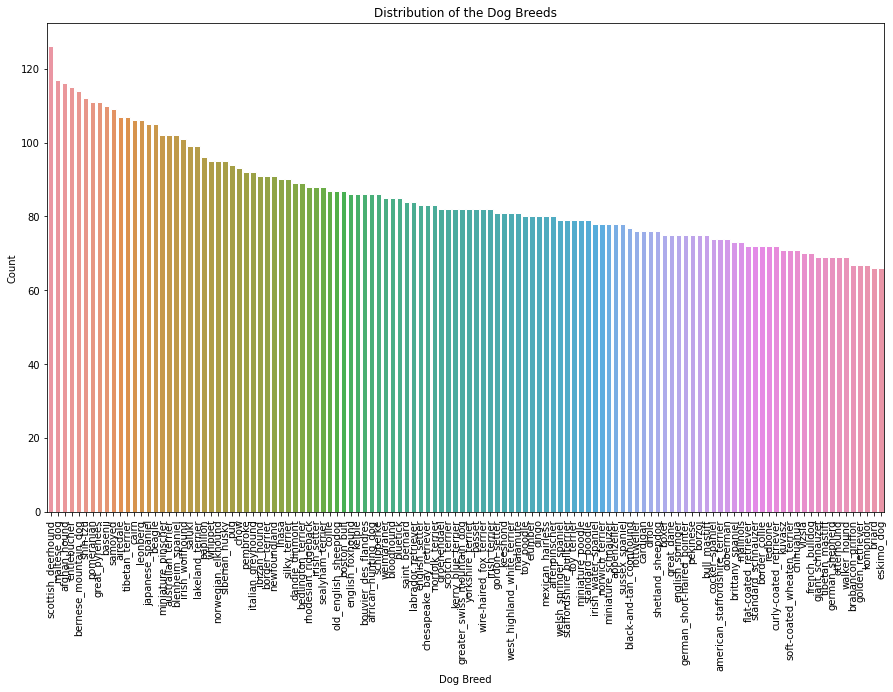

In [ ]:
yy = pd.value_counts(train_dogs['breed'])


fig, ax = plt.subplots()
fig.set_size_inches(15,9)
sns.set_style("whitegrid")

ax = sns.barplot(x = yy.index, y = yy, data = train_dogs)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 10)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of the Dog Breeds')

**One hot encoding the labels**

In [ ]:
target_lables = train_dogs['breed']
one_hot = pd.get_dummies(target_lables, sparse = True)
one_hot_labels = np.asarray(one_hot)



**Image parameters to be used**

In [ ]:

IMG_SIZE = 224

IMG_SHAPE = (IMG_SIZE, IMG_SIZE)


n_classes = 120

**Function to plot the images**

In [ ]:
x_train = []
y_train = []
y_orig_label = []
orig_label = []
i = 0 

for f, breed in tqdm(train_dogs.values):
    img = cv2.imread('/content/train/{}.jpg'.format(f))
    label = one_hot_labels[i]
    orig_label = target_lables[i]
    x_train.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
    y_train.append(label)
    y_orig_label.append(orig_label)
    i += 1

 



100%|██████████| 10222/10222 [00:31<00:00, 319.80it/s]


In [ ]:
y_train_raw = np.array(y_train, np.uint8)
x_train_raw = np.array(x_train, np.float32) / 255.


In [ ]:
def plot_images(images, cls_true, cls_pred=None):
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(2, 3)
    fig.subplots_adjust(hspace=0.8, wspace=0.8)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')

        # Show true classes.
        xlabel = "True: {0}".format(cls_true[i])
        
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

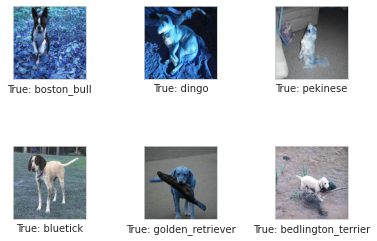

In [ ]:
train_img = x_train[0:6]
label_img = y_orig_label[0:6]
plot_images(images=train_img, cls_true=label_img)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
path_train = '/content/train'
#Generator
def generator(df, path):
    
    while 1:
        for i in range(int(df.shape[0])):
            img_path = os.path.join(path, df.iloc[i]['id']+ '.jpg')
    
            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            #y = df.iloc[i]['breed']
            #y = onehot.transform(y).toarray()
            #print(img.shape,np.array([y]).shape)
            yield (x)
                    
gen_1 = generator(train_dogs, path_train)

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.optimizers import SGD, Adam
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.applications.vgg19 import VGG19




In [ ]:
num_class = y_train_raw.shape[1]

print(num_class)


120


In [ ]:
vgg16_weights = '/content/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
base_model = VGG16(weights=vgg16_weights, input_shape=(224, 224, 3))


#base_model.summary()

In [ ]:
optimizer = Adam(lr=0.0001)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [ ]:
feature = model.predict_generator(gen_1,steps=10221, verbose=1)




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


10221/10221 [==============================] - 138s 10ms/step


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, train_dogs.iloc[:10221]['breed'])

print(X_train[0:4])

[[ 0.         0.5216961  0.        ...  0.         0.         0.       ]
 [ 0.         0.         1.472204  ...  0.         4.8351917  0.       ]
 [ 4.8858757 11.657444   0.        ...  0.         0.        23.923037 ]
 [ 6.193588   0.         0.        ...  0.        17.130024   0.       ]]


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Linear kernel accuracy : ",acc)

Linear kernel accuracy :  0.7147887323943662


In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("RBF kernel accuracy: ",acc)

RBF kernel accuracy:  0.7331768388106417


In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("polynomial kernel accuracy : ",acc)

polynomial kernel accuracy :  0.5426447574334898
